# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the OpenWeatherMap API key and base URL
api_key = "4b8adf8c56092b6975794af5abbf129d"  
base_url = "http://api.openweathermap.org/data/2.5/weather"

# Define lists to store weather data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through all the cities in the list to fetch weather data
for i, city in enumerate(cities):
    # Create endpoint URL with each city
    params = {
        "q": city,
        "appid": api_key,
        "units": "metric"  # You can adjust units as needed (metric for Celsius)
    }

    # Run an API request for each city
    try:
        # Make the API request
        response = requests.get(base_url, params=params)
        data = response.json()

        # Check if the API returned a valid response
        if data.get("cod") == 200:
            # Parse out the required weather data
            city_name = data["name"]
            city_lat = data["coord"]["lat"]
            city_lon = data["coord"]["lon"]
            city_temp = data["main"]["temp"]
            city_humidity = data["main"]["humidity"]
            city_cloudiness = data["clouds"]["all"]
            city_wind_speed = data["wind"]["speed"]
            city_country = data["sys"]["country"]
            city_date = datetime.utcfromtimestamp(data["dt"]).strftime('%Y-%m-%d %H:%M:%S')

            # Append the data to the list
            city_data.append({
                "City": city_name,
                "Lat": city_lat,
                "Lon": city_lon,
                "Temp": city_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_cloudiness,
                "Wind Speed": city_wind_speed,
                "Country": city_country,
                "Date": city_date
            })

            # Log the data retrieval
            print(f"Processing Record {i + 1} | {city_name}")

        else:
            print(f"City not found: {city}. Skipping...")

    except Exception as e:
        print(f"Error processing {city}: {str(e)}. Skipping...")

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | Ust-Nera
Processing Record 2 | Invercargill
Processing Record 3 | Loíza
Processing Record 4 | Enewetak
Processing Record 5 | Dudinka
City not found: taiohae. Skipping...
Processing Record 7 | Baruun-Urt
Processing Record 8 | Angaur State
Processing Record 9 | Paracuru
Processing Record 10 | Port-aux-Français
Processing Record 11 | Minas de Marcona
Processing Record 12 | Fiambalá
Processing Record 13 | Jamestown
Processing Record 14 | Bredasdorp
Processing Record 15 | Saint Paul Harbor
Processing Record 16 | Antsiranana
Processing Record 17 | Talnakh
Processing Record 18 | Avarua
Processing Record 19 | San Antonio de Palé
Processing Record 20 | Iskateley
Processing Record 21 | Kavalerovo
Processing Record 22 | Puerto Natales
Processing Record 23 | West Island
Processing Record 24 | Margate
Processing Record 25 | Coruripe
Processing Record 26 | Saipan
Processing Record 27 | Gorgan
Processing Record 28 | Port Sai

Processing Record 242 | Kirakira
City not found: vingt cinq. Skipping...
Processing Record 244 | Zdvinsk
Processing Record 245 | Prince Rupert
Processing Record 246 | Pathein
Processing Record 247 | Hithadhoo
Processing Record 248 | Tôlanaro
Processing Record 249 | Egilsstadir
Processing Record 250 | Cabo San Lucas
Processing Record 251 | The Pas
Processing Record 252 | Plouzané
Processing Record 253 | Puerto Baquerizo Moreno
Processing Record 254 | Longboat Key
Processing Record 255 | Boali
Processing Record 256 | Gadzhiyevo
Processing Record 257 | Puerto Ayora
Processing Record 258 | Tofol
City not found: oualidia. Skipping...
Processing Record 260 | Beau Vallon
City not found: villa alberto andres alvarado aramburo. Skipping...
Processing Record 262 | Afaahiti
Processing Record 263 | Fortuna
Processing Record 264 | Puerto Ayacucho
Processing Record 265 | Bathsheba
Processing Record 266 | Richards Bay
Processing Record 267 | Katsuren-haebaru
Processing Record 268 | Mukalla
Processing

Processing Record 479 | Brisas de Zicatela
Processing Record 480 | Coahuayana de Hidalgo
Processing Record 481 | Namsos
Processing Record 482 | Lewistown
Processing Record 483 | Xigazê
Processing Record 484 | Steinbach am Taunus
City not found: saratamata. Skipping...
Processing Record 486 | Darwin
Processing Record 487 | Santa Elena de Uairen
Processing Record 488 | Acapulco de Juárez
Processing Record 489 | Mount Pearl
City not found: alotau. Skipping...
Processing Record 491 | Orcopampa
Processing Record 492 | Qurayyat
Processing Record 493 | Lourdes
Processing Record 494 | Oranjemund
Processing Record 495 | Ponta Delgada
City not found: zangguy. Skipping...
Processing Record 497 | Tazacorte
Processing Record 498 | Igarapé Miri
Processing Record 499 | Syktyvkar
Processing Record 500 | Panacan
Processing Record 501 | Lashio
Processing Record 502 | Huangmei
Processing Record 503 | Kruisfontein
Processing Record 504 | Boguchany
Processing Record 505 | Bovalino
Processing Record 506 | B

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lon           584
Temp          584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ust-Nera,64.5667,143.2000,-1.55,74,100,1.34,RU,2023-10-03 22:56:07
1,Invercargill,-46.4000,168.3500,17.23,51,93,5.36,NZ,2023-10-03 22:47:52
2,Loíza,18.4313,-65.8802,27.58,88,94,1.68,PR,2023-10-03 22:56:07
3,Enewetak,11.3474,162.3373,29.28,76,53,7.72,MH,2023-10-03 22:56:07
4,Dudinka,69.4058,86.1778,-0.74,86,33,8.49,RU,2023-10-03 22:56:07


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Ust-Nera,64.5667,143.2000,-1.55,74,100,1.34,RU,2023-10-03 22:56:07
1,Invercargill,-46.4000,168.3500,17.23,51,93,5.36,NZ,2023-10-03 22:47:52
2,Loíza,18.4313,-65.8802,27.58,88,94,1.68,PR,2023-10-03 22:56:07
3,Enewetak,11.3474,162.3373,29.28,76,53,7.72,MH,2023-10-03 22:56:07
4,Dudinka,69.4058,86.1778,-0.74,86,33,8.49,RU,2023-10-03 22:56:07


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

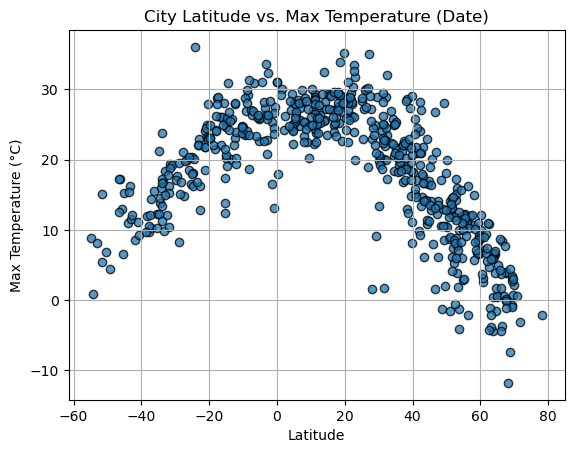

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Temp'], edgecolor='black', alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Max Temperature (Date)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

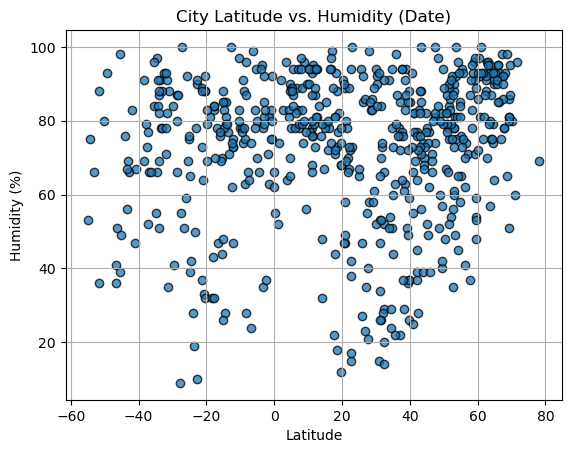

In [10]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (Date)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

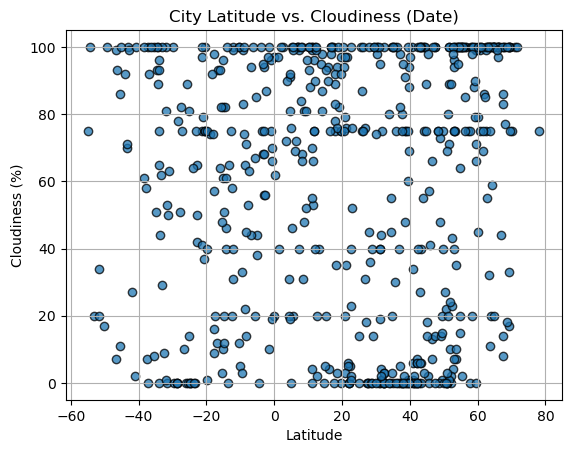

In [11]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (Date)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

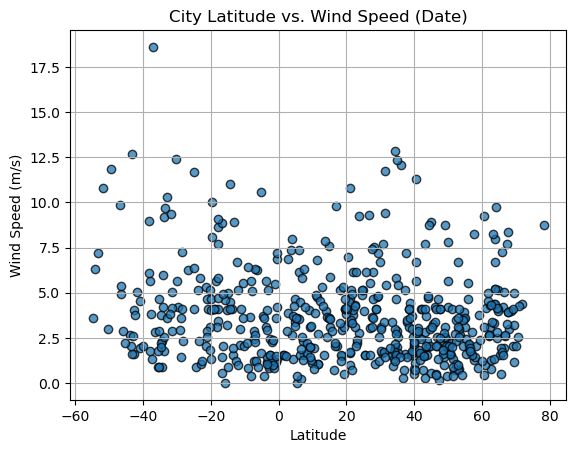

In [25]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (Date)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title, filename):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line's y-values
    regress_values = x_values * slope + intercept

    # Create the linear regression equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create the scatter plot
    plt.scatter(x_values, y_values, edgecolor='black', alpha=0.75)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    
    # Annotate the line equation on the plot
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Display the r-squared value
    plt.annotate(f"R-squared = {round(rvalue**2, 2)}", (min(x_values), max(y_values) - 10), fontsize=12, color="red")

    # Show legend
    plt.legend()
    
    # Save the figure
    plt.savefig(filename)

    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Ust-Nera,64.5667,143.2000,-1.55,74,100,1.34,RU,2023-10-03 22:56:07
2,Loíza,18.4313,-65.8802,27.58,88,94,1.68,PR,2023-10-03 22:56:07
3,Enewetak,11.3474,162.3373,29.28,76,53,7.72,MH,2023-10-03 22:56:07
4,Dudinka,69.4058,86.1778,-0.74,86,33,8.49,RU,2023-10-03 22:56:07
5,Baruun-Urt,46.6806,113.2792,1.53,66,13,3.70,MN,2023-10-03 22:56:07


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Invercargill,-46.4000,168.3500,17.23,51,93,5.36,NZ,2023-10-03 22:47:52
7,Paracuru,-3.4100,-39.0306,27.28,78,68,6.07,BR,2023-10-03 22:56:08
8,Port-aux-Français,-49.3500,70.2167,4.43,93,100,20.98,TF,2023-10-03 22:56:08
9,Minas de Marcona,-15.2119,-75.1103,13.87,88,82,7.19,PE,2023-10-03 22:56:08
10,Fiambalá,-27.6871,-67.6149,21.11,9,51,1.45,AR,2023-10-03 22:56:08


###  Temperature vs. Latitude Linear Regression Plot

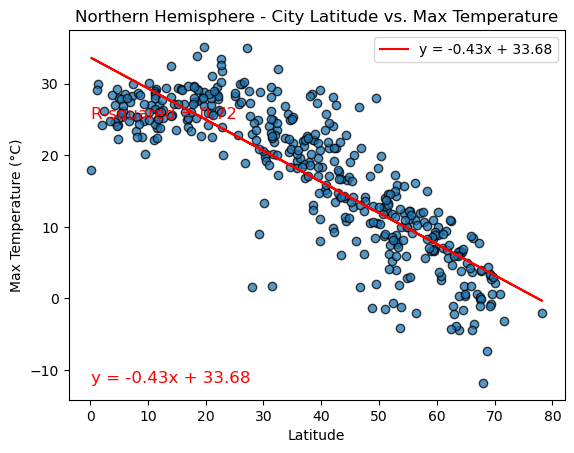

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Temp'],
    'Latitude',
    'Max Temperature (°C)',
    'Northern Hemisphere - City Latitude vs. Max Temperature',
    'northern_hemi_df'
)


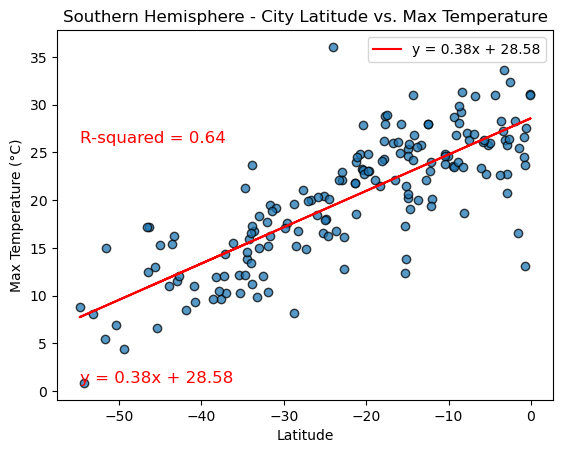

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Temp'],
    'Latitude',
    'Max Temperature (°C)',
    'Southern Hemisphere - City Latitude vs. Max Temperature',
    'southern_hemi_df'
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

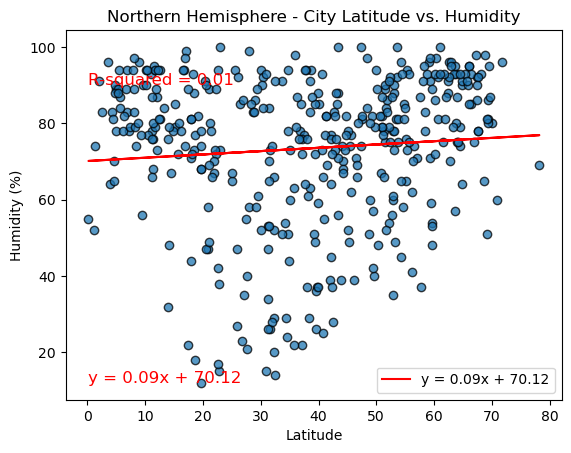

In [17]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Humidity'],
    'Latitude',
    'Humidity (%)',
    'Northern Hemisphere - City Latitude vs. Humidity',
    'northern_hemi_df')

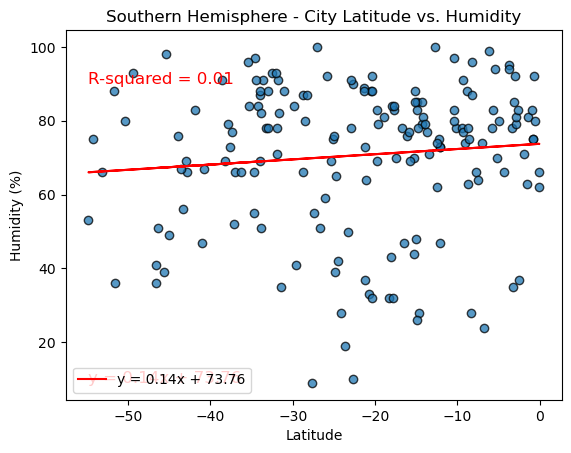

In [18]:
#Southern
plot_linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Humidity'],
    'Latitude',
    'Humidity (%)',
    'Southern Hemisphere - City Latitude vs. Humidity',
    'southern_hemi_df')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

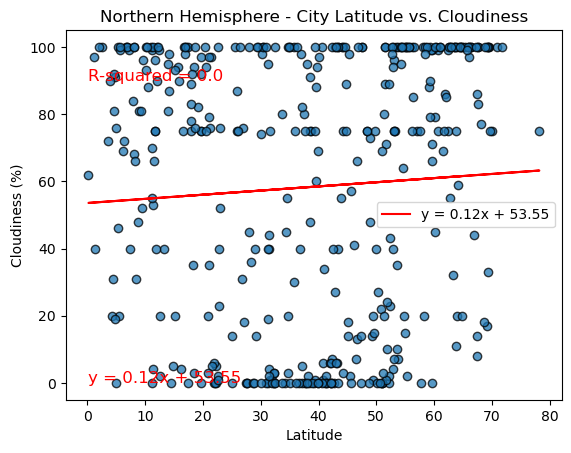

In [19]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Cloudiness'],
    'Latitude',
    'Cloudiness (%)',
    'Northern Hemisphere - City Latitude vs. Cloudiness',
    'northern_hemi_df'
)

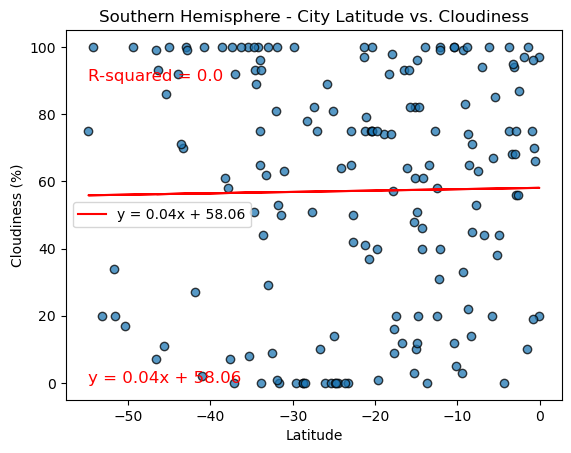

In [20]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'],
    'Latitude',
    'Cloudiness (%)',
    'Southern Hemisphere - City Latitude vs. Cloudiness',
    'southern_hemi_df'
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

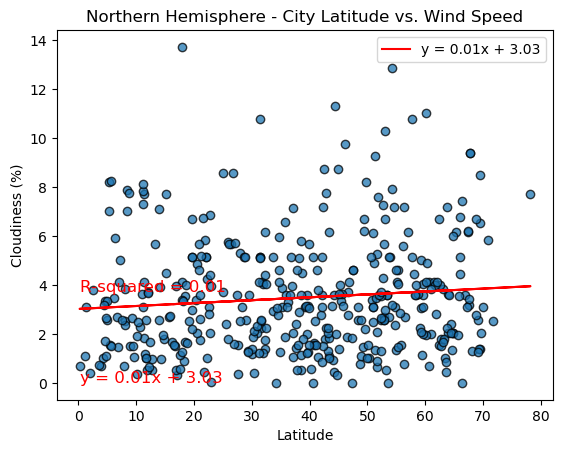

In [21]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Wind Speed'],
    'Latitude',
    'Cloudiness (%)',
    'Northern Hemisphere - City Latitude vs. Wind Speed',
    'northern_hemi_df'
)

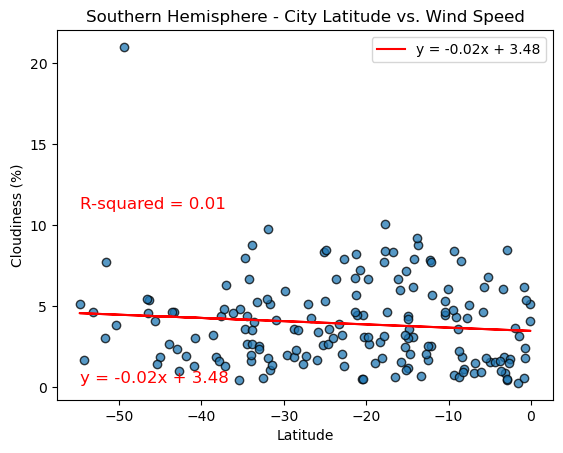

In [22]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Wind Speed'],
    'Latitude',
    'Cloudiness (%)',
    'Southern Hemisphere - City Latitude vs. Wind Speed',
    'southern_hemi_df'
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE